In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols


import warnings
warnings.filterwarnings('ignore')

# 1. Import Cleaned Data

In [260]:
data = pd.read_csv('added_features_data.csv',index_col=0)
dummy_data = pd.read_csv('dummy_data.csv',index_col=0)
final_data = pd.concat([data,dummy_data],axis=1)

In [261]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_inside,age_when_sold
0,538000.0,3,2.25,2570,7242,2.0,2170,47.7210,-122.319,1690,7639,9812,2570.0,63
1,571000.0,4,2.00,2750,7807,1.5,2250,47.7168,-122.287,1510,7807,10557,2750.0,98
2,315000.0,3,1.00,960,6634,1.0,960,47.7264,-122.310,1570,7203,7594,960.0,62
3,382500.0,2,1.00,1190,4440,1.0,1190,47.7135,-122.287,1060,5715,5630,1190.0,33
4,425000.0,3,1.75,2500,6840,1.0,1300,47.7222,-122.320,1580,8691,9340,2500.0,57


In [262]:
dummy_data.head()

,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [263]:
pd.set_option('display.max_columns', 100)
final_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_inside,age_when_sold,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,538000.0,3,2.25,2570,7242,2.0,2170,47.7210,-122.319,1690,7639,9812,2570.0,63,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,571000.0,4,2.00,2750,7807,1.5,2250,47.7168,-122.287,1510,7807,10557,2750.0,98,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,315000.0,3,1.00,960,6634,1.0,960,47.7264,-122.310,1570,7203,7594,960.0,62,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,382500.0,2,1.00,1190,4440,1.0,1190,47.7135,-122.287,1060,5715,5630,1190.0,33,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,425000.0,3,1.75,2500,6840,1.0,1300,47.7222,-122.320,1580,8691,9340,2500.0,57,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [264]:
# continuous = ['sqft_living','sqft_lot','sqft_above','lat','long','sqft_living15','sqft_lot15',
#              'total_sqft','total_sqft_inside','age_when_sold']
# discrete = ['bedrooms','bathroom','floors']

# 2. Baseline Model

https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa

* Starting with a simple model as a baseline consistently led to a better end product.
* Fundamentally, a baseline is a model that is both simple to set up and has a reasonable chance of providing decent results. Experimenting with them is usually quick and low cost, since implementations are widely available in popular packages.

In our case, we created a baseline model that was simple to set up in which we data cleaned and created dummy variables for our categorical variables.

In [265]:
# outcome is target
outcome = 'price'
# x_cols are the predictors
x_cols = list(final_data.drop(['price'],axis=1).columns)

In [266]:
# testing regression model with current train data
pred_sum = '+'.join(x_cols)
formula = outcome + '~' + pred_sum

model_1_results = ols(formula=formula, data=final_data).fit()
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     959.4
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:14:54   Log-Likelihood:            -2.5817e+05
No. Observations:               19087   AIC:                         5.165e+05
Df Residuals:                   19022   BIC:                         5.170e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -8.558e+07   3.95e+06    -21.649      0.000   -9.33e+07   -7.78e+07
bedrooms          -3.212e+04   1969.334    -16.312      0.000    -3.6e+04   -2.83e+04
bathrooms          4.413e+04   3237.500     13.630      0.000    3.78e+04    5.05e+04
sqft_living          91.3615     11.389      8.022      0.000      69.037     113.686
sqft_lot            -45.5719      5.695     -8.002      0.000     -56.734     -34.410
floors             1205.7636   3961.390      0.304      0.761   -6558.912    8970.439
sqft_above           49.1269      6.574      7.473      0.000      36.241      62.012
lat                6.596e+05   2.08e+04     31.778      0.000    6.19e+05       7e+05
long              -4.428e+05    3.2e+04    -13.825      0.000   -5.06e+05    -3.8e+05
sqft_living15        30.6352      3.374      9.080      0.000      24.022      37.248
sqft_lot15           -0.2170      0.072     -3.017      0.003      -0.358      -0.076
total_sqft           45.7895      5.695      8.041      0.000      34.627      56.952
total_sqft_inside     6.1034     17.716      0.345      0.730     -28.621      40.828
age_when_sold      1456.6085    470.836      3.094      0.002     533.728    2379.489
waterfront_1       5.814e+05   1.92e+04     30.341      0.000    5.44e+05    6.19e+05
view_1             8.553e+04    1.1e+04      7.806      0.000    6.41e+04    1.07e+05
view_2             6.705e+04   6691.248     10.021      0.000    5.39e+04    8.02e+04
view_3             1.365e+05   9299.688     14.677      0.000    1.18e+05    1.55e+05
view_4             2.418e+05   1.39e+04     17.383      0.000    2.14e+05    2.69e+05
condition_2        5.861e+04   4.02e+04      1.460      0.144   -2.01e+04    1.37e+05
condition_3        7.217e+04   3.74e+04      1.929      0.054   -1149.914    1.45e+05
condition_4        9.758e+04   3.74e+04      2.607      0.009    2.42e+04    1.71e+05
condition_5        1.413e+05   3.76e+04      3.754      0.000    6.75e+04    2.15e+05
quarter_sold_2     2.335e+04   4690.438      4.978      0.000    1.42e+04    3.25e+04
quarter_sold_3     1.934e+04   6153.171      3.143      0.002    7278.144    3.14e+04
quarter_sold_4     2.208e+04   6277.680      3.517      0.000    9770.976    3.44e+04
year_sold_2015     3.989e+04   4763.374      8.375      0.000    3.06e+04    4.92e+04
decade_built_1910 -1.526e+04   1.11e+04     -1.373      0.170    -3.7e+04    6524.664
decade_built_1920 -2672.3973   1.33e+04     -0.202      0.840   -2.87e+04    2.33e+04
decade_built_1930 -1.577e+04    1.8e+04     -0.878      0.380    -5.1e+04    1.94e+04
decade_built_1940 -5.316e+04   2.08e+04     -2.558      0.011   -9.39e+04   -1.24e+04
decade_built_1950 -6.724e+04   2.49e+04     -2.696      0.007   -1.16e+05   -1.84e+04
decade_built_1960 -6.796e+04   2.94e+04     -2.308      0.021   -1.26e+05

## Interpretation

* R-squared is ~0.763, showing that our data is closely fitted to our regression line
* F-statistic p-value is 0.00, probability that our sample would represent the population, holds true
* There are a lot of p-values > 0.05 for our coefficients, indicating there is no statistically significant relationship between the coefficient and predictor.
* Skewness is not 0 (normal) and is higher than 1, meaning the data is highly skewed
* Kurtosis is not 3 (normal) and is higher than 3, meaning the tails are heavy

# 3. Linear Assumption - Linearity between Features and Price

The linearity assumptions requires that there is a linear relationship between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant.

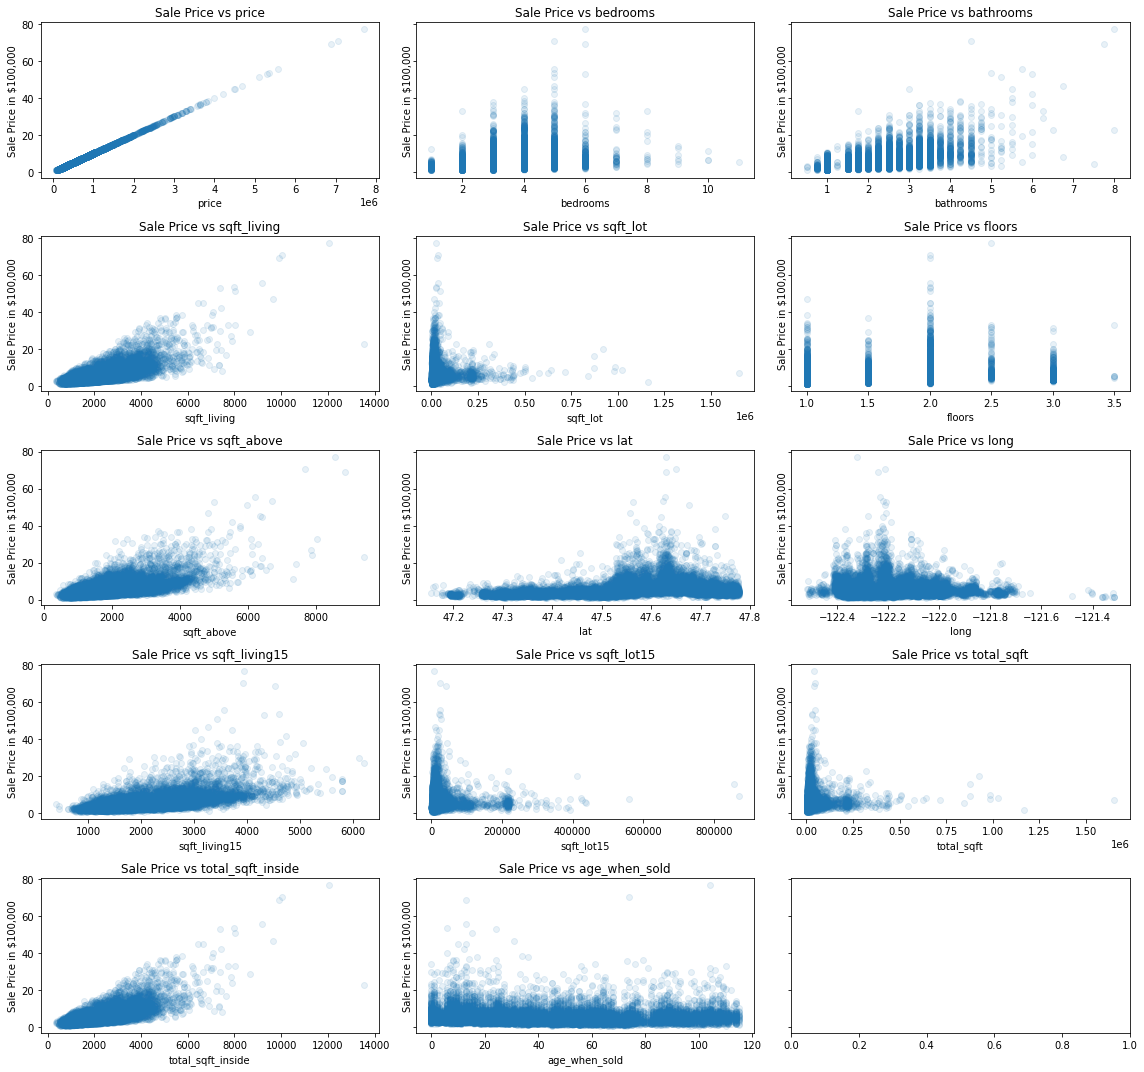

In [267]:
# plotting linearity between feature and price
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), data.columns):
    ax.scatter(data[column], data['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

In [268]:
# checking correlation between each feature and price
data.corr()['price'].sort_values(ascending=False)

price                1.000000
sqft_living          0.704079
total_sqft_inside    0.702235
sqft_above           0.608251
sqft_living15        0.580673
bathrooms            0.526786
bedrooms             0.318083
lat                  0.304657
floors               0.256381
total_sqft           0.101436
sqft_lot             0.085975
sqft_lot15           0.080577
long                 0.019184
age_when_sold       -0.050806
Name: price, dtype: float64

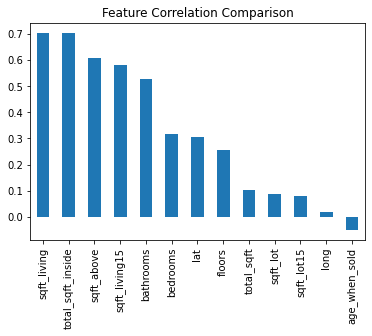

In [269]:
# plotting correlation between each feature and price
data.corr()['price'].drop(['price']).sort_values(ascending=False).plot(kind='bar').set_title(
    'Feature Correlation Comparison');

I decided if any of the features have a correlation of under absolute value of 0.10, there is clearly no relationship. I will drop the following below from the model.

In [270]:
# drop features from data
data = data.drop(['sqft_lot','long','sqft_lot15','age_when_sold'],axis=1)

In [271]:
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,lat,sqft_living15,total_sqft,total_sqft_inside
0,538000.0,3,2.25,2570,2.0,2170,47.7210,1690,9812,2570.0
1,571000.0,4,2.00,2750,1.5,2250,47.7168,1510,10557,2750.0
2,315000.0,3,1.00,960,1.0,960,47.7264,1570,7594,960.0
3,382500.0,2,1.00,1190,1.0,1190,47.7135,1060,5630,1190.0
4,425000.0,3,1.75,2500,1.0,1300,47.7222,1580,9340,2500.0


# 4. Removing Outliers

I removed outliers that did not make sense. If there was a column that had values that clearly was an outlier, I filtered out the top 1% percentile.

In [272]:
# shows price variable and the price for each percentile
for column in data.columns:
    print(f'{column}')
    print('------------------------------')
    for i in range(0,11):
        q = i/100
        print("{} percentile: {}".format(q,data[column].quantile(q=q)))
    print('\n')

    for i in range(90,101):
        q = i/100
        print("{} percentile: {}".format(q,data[column].quantile(q=q)))
    print('\n')

price
------------------------------
0.0 percentile: 78000.0
0.01 percentile: 158972.0
0.02 percentile: 180000.0
0.03 percentile: 195000.0
0.04 percentile: 205000.0
0.05 percentile: 214030.0
0.06 percentile: 220000.0
0.07 percentile: 229901.00000000003
0.08 percentile: 235000.0
0.09 percentile: 241487.0
0.1 percentile: 248000.0


0.9 percentile: 890000.0
0.91 percentile: 920260.0000000021
0.92 percentile: 957000.0
0.93 percentile: 999998.02
0.94 percentile: 1080000.0
0.95 percentile: 1170000.0
0.96 percentile: 1270000.0
0.97 percentile: 1400000.0
0.98 percentile: 1600000.0
0.99 percentile: 1991399.9999999942
1.0 percentile: 7700000.0


bedrooms
------------------------------
0.0 percentile: 1.0
0.01 percentile: 2.0
0.02 percentile: 2.0
0.03 percentile: 2.0
0.04 percentile: 2.0
0.05 percentile: 2.0
0.06 percentile: 2.0
0.07 percentile: 2.0
0.08 percentile: 2.0
0.09 percentile: 2.0
0.1 percentile: 2.0


0.9 percentile: 4.0
0.91 percentile: 4.0
0.92 percentile: 5.0
0.93 percentile: 5.0
0.

In [273]:
# columns that need outliers to be removed
outliers = ['price','total_sqft','total_sqft_inside']

## Price

Because our audience is middle class homebuyers, houses would fall below the 1m range

In [274]:
# removing outliers by filtering for under 1m
# Subsetting to remove extreme outliers
# model_1_data = model_1_data[model_1_data['price'] <= 1000000]
# Applying a log transformation
data['log_price'] = data['price'].map(np.log)
data = data.drop(['price'],axis=1)

## Total Square Feet

In [275]:
# removing the top 1% percentile of total_sqft
data = data[data['total_sqft'] <= 214820]

## Total Square Feet Inside

In [276]:
# removing the top 1% percentile of total_sqft_inside
data['total_sqft'] = data[data['total_sqft_inside'] <= 4980]

# 5. Normalizing/Transform Features

* having the data more normally distributed will benefit the model and model performance in general
* while normality of the predictors is not a mandatory assumption, having approximately normal features may be helpful

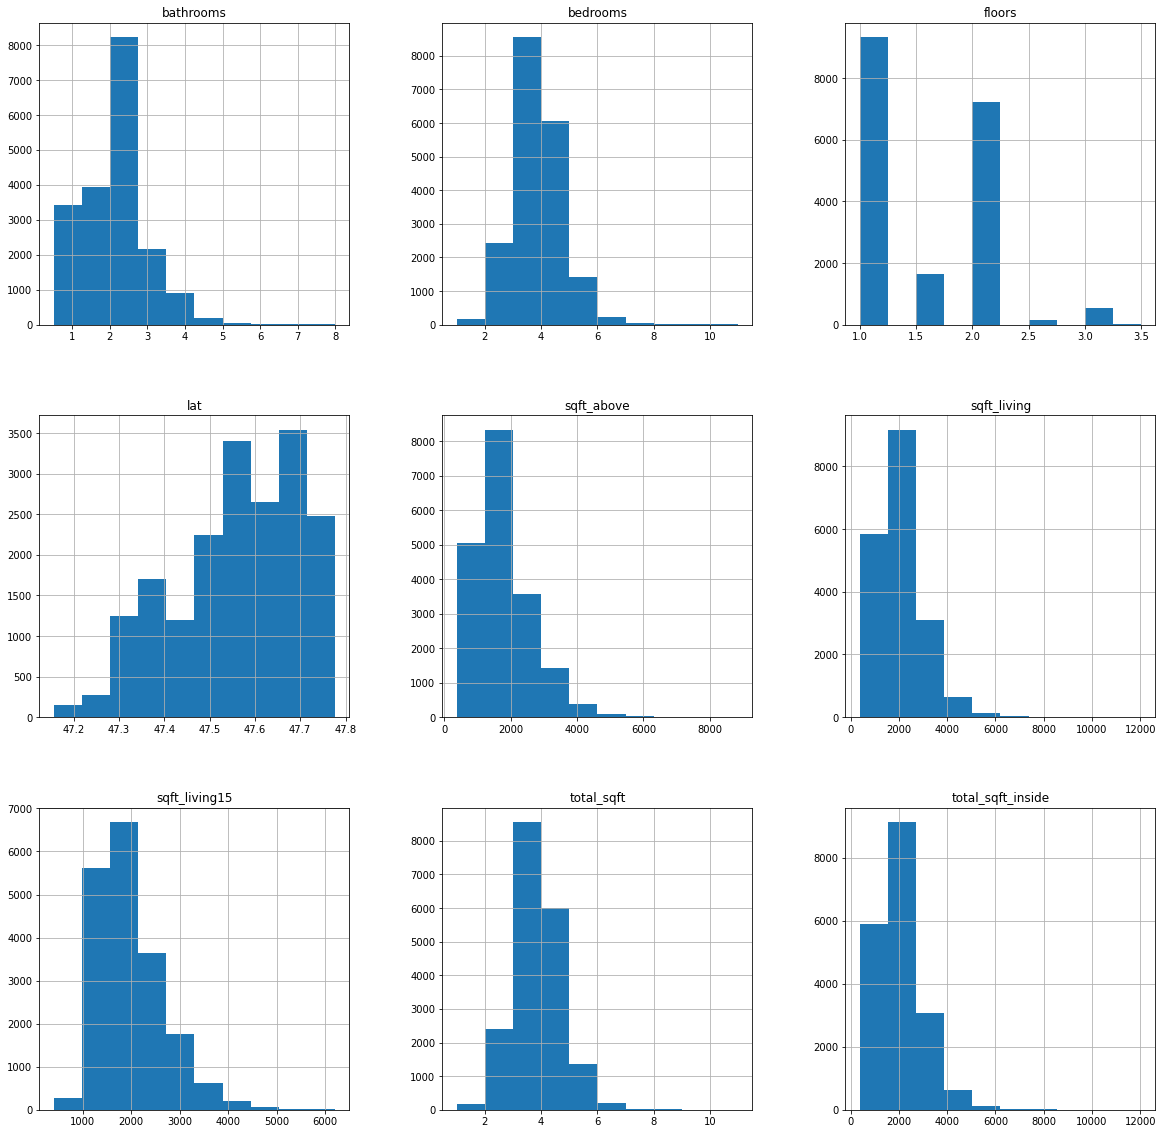

In [277]:
# plotting each continuous feature
data.drop(['log_price'],axis=1).hist(figsize=(20,20));

Looks like all of the features are not normal in which it needs to be improved on. I applied the logarithmic function and normalized each non-normal feature.
* Log transforms results in having more normal data distributions
* Because features vary largely in magnitudes, the coefficient sizes will fluctuate largely in magnitude as well. This can give the false impression that some variables are less important than others. Scaling the features allows them to have similar magnitudes.

In [278]:
# log transform each feature and concatenate them into df_log
df_log = pd.DataFrame([])

for i in data.drop(['log_price'],axis=1):
    df_log['log_' + i] = np.log(data[i])  
        
# normalizes each feature
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

model_1_data = pd.concat([df_log.apply(normalize),data['log_price']],axis=1)
model_1_data.head()

,log_bedrooms,log_bathrooms,log_sqft_living,log_floors,log_sqft_above,log_lat,log_sqft_living15,log_total_sqft,log_total_sqft_inside,log_price
0,-0.281691,0.340279,0.714133,1.002201,0.676692,1.158215,-0.325651,-0.271391,0.720744,13.195614
1,0.736166,0.039616,0.874047,0.186916,0.761514,1.127938,-0.670108,0.751212,0.880354,13.255144
2,-0.281691,-1.729774,-1.612073,-0.962165,-1.234103,1.197138,-0.550926,-0.271391,-1.601023,12.660328
3,-1.716280,-1.729774,-1.104713,-0.962165,-0.730894,1.104147,-1.752368,-1.712670,-1.094631,12.854484
4,-0.281691,-0.301248,0.648898,-0.962165,-0.523751,1.166865,-0.531506,-0.271391,0.655634,12.959844


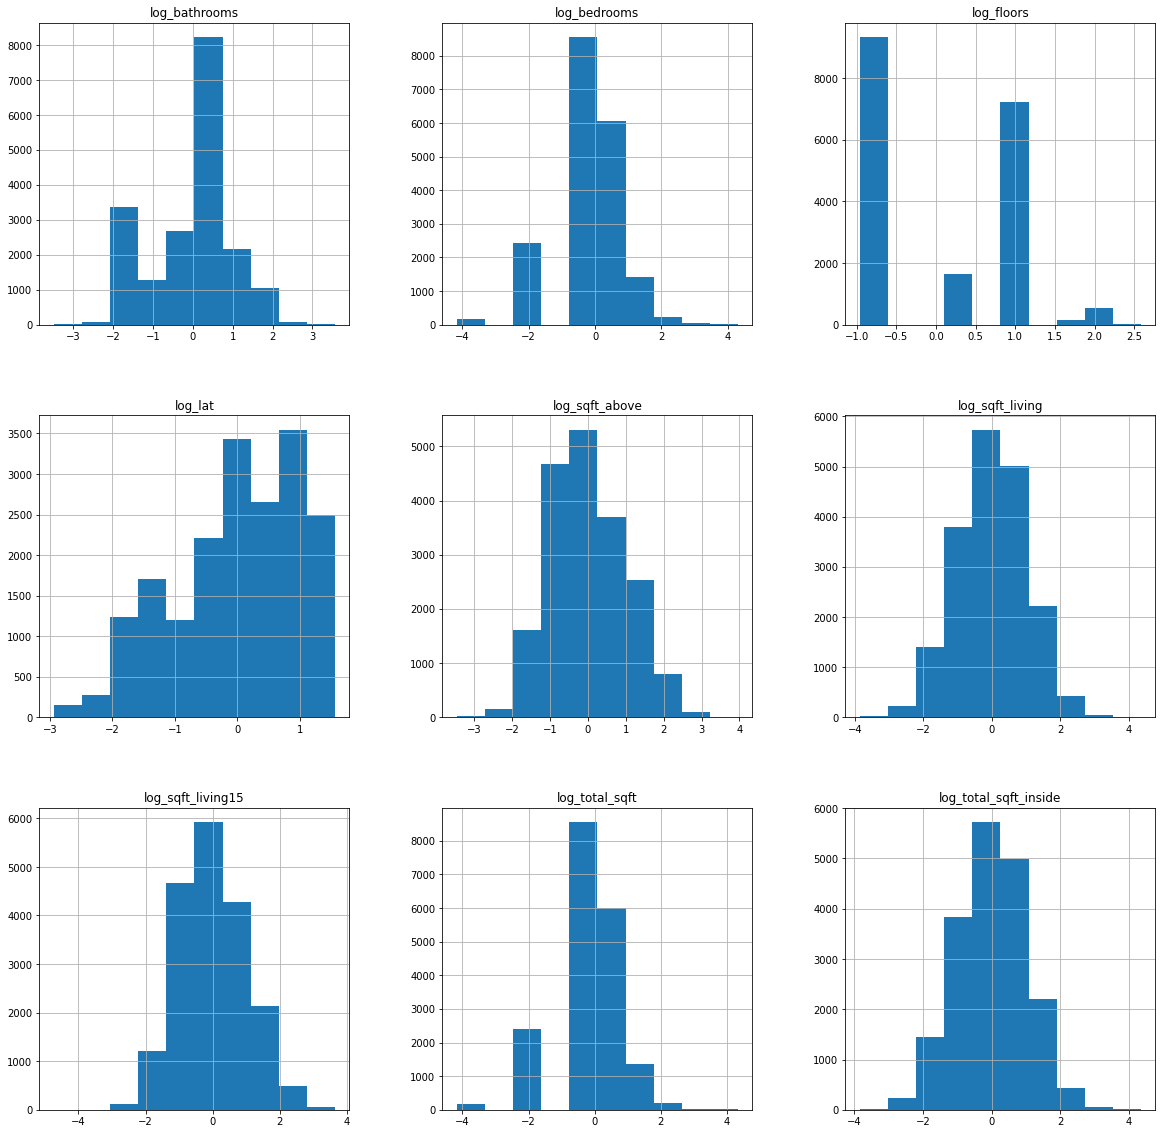

In [279]:
# plotting each continuous feature once log transformed and normalized
model_1_data.drop(['log_price'],axis=1).hist(figsize=(20,20));

In [280]:
model_1_data.head()

,log_bedrooms,log_bathrooms,log_sqft_living,log_floors,log_sqft_above,log_lat,log_sqft_living15,log_total_sqft,log_total_sqft_inside,log_price
0,-0.281691,0.340279,0.714133,1.002201,0.676692,1.158215,-0.325651,-0.271391,0.720744,13.195614
1,0.736166,0.039616,0.874047,0.186916,0.761514,1.127938,-0.670108,0.751212,0.880354,13.255144
2,-0.281691,-1.729774,-1.612073,-0.962165,-1.234103,1.197138,-0.550926,-0.271391,-1.601023,12.660328
3,-1.716280,-1.729774,-1.104713,-0.962165,-0.730894,1.104147,-1.752368,-1.712670,-1.094631,12.854484
4,-0.281691,-0.301248,0.648898,-0.962165,-0.523751,1.166865,-0.531506,-0.271391,0.655634,12.959844


# 6. Simple Regression for each Predictor Variable (Processed)

* The **Y and Fitted vs. X graph** plots the dependent variable against our predicted values with a confidence interval. The positive relationship shows that height and weight are correlated, i.e., when one variable increases the other increases.

* The **Residuals versus height graph** shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds.

* The **Partial regression plot** shows the relationship between height and weight, taking in to account the impact of adding other independent variables on our existing height coefficient. You'll later learn how this same graph changes when you add more variables.

* The **Component and Component Plus Residual (CCPR) plot** is an extension of the partial regression plot. It shows where the trend line would lie after adding the impact of adding our other independent variables on the weight.

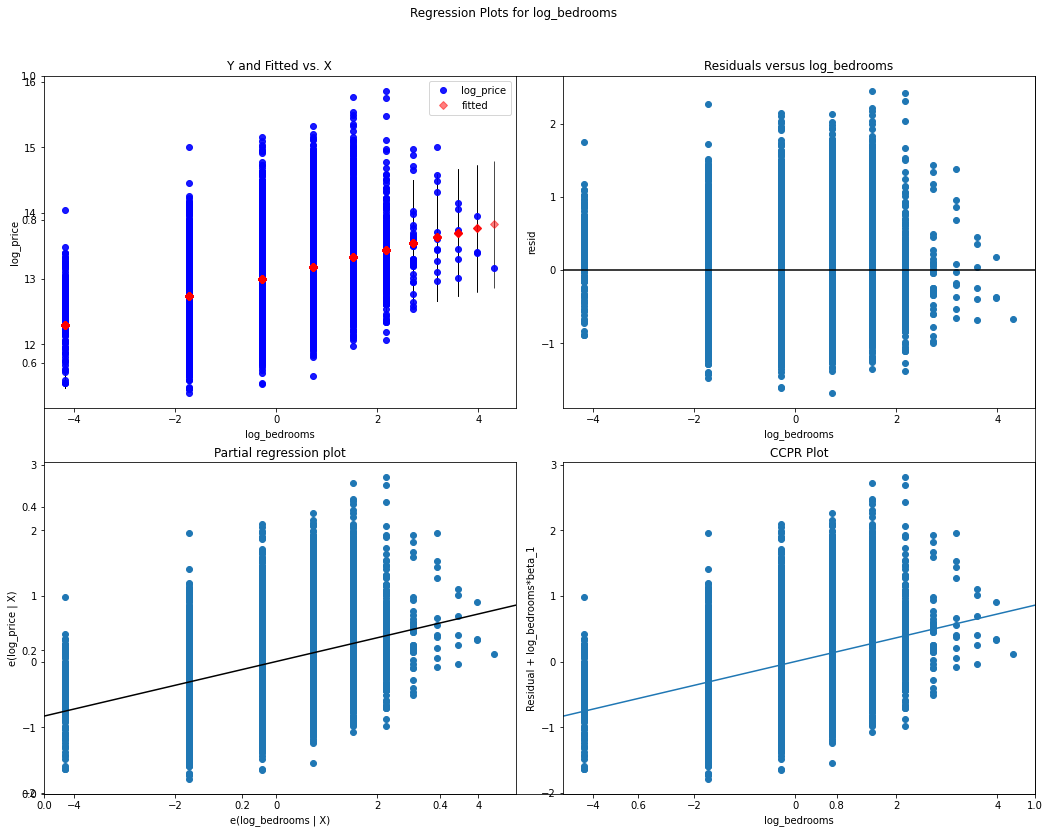

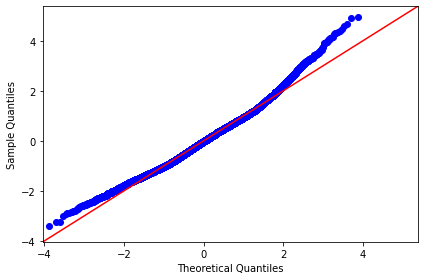

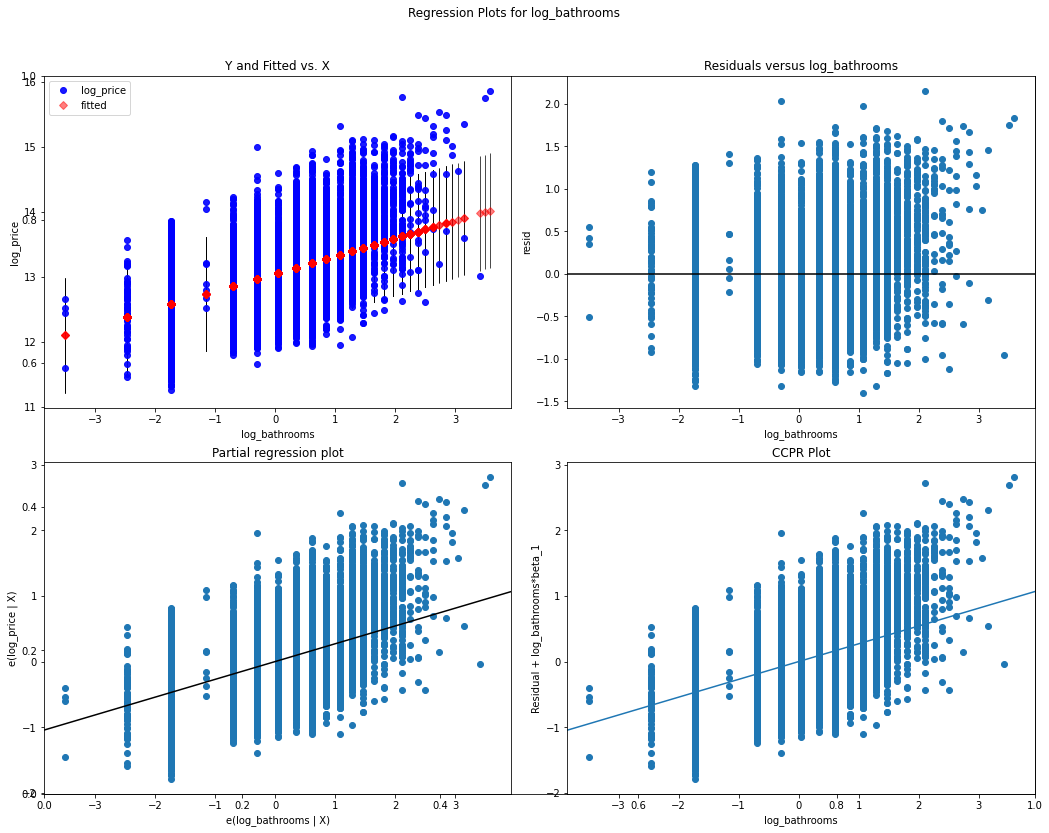

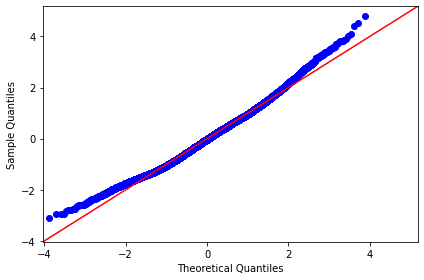

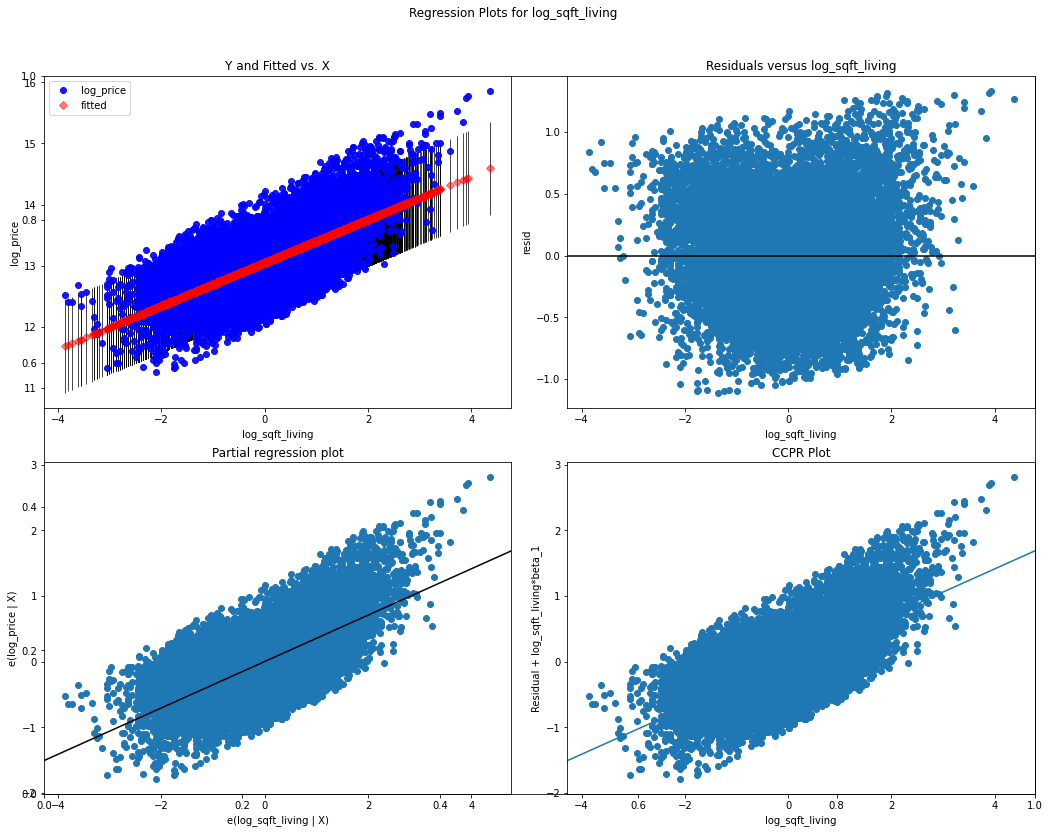

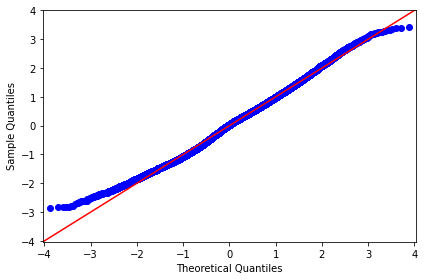

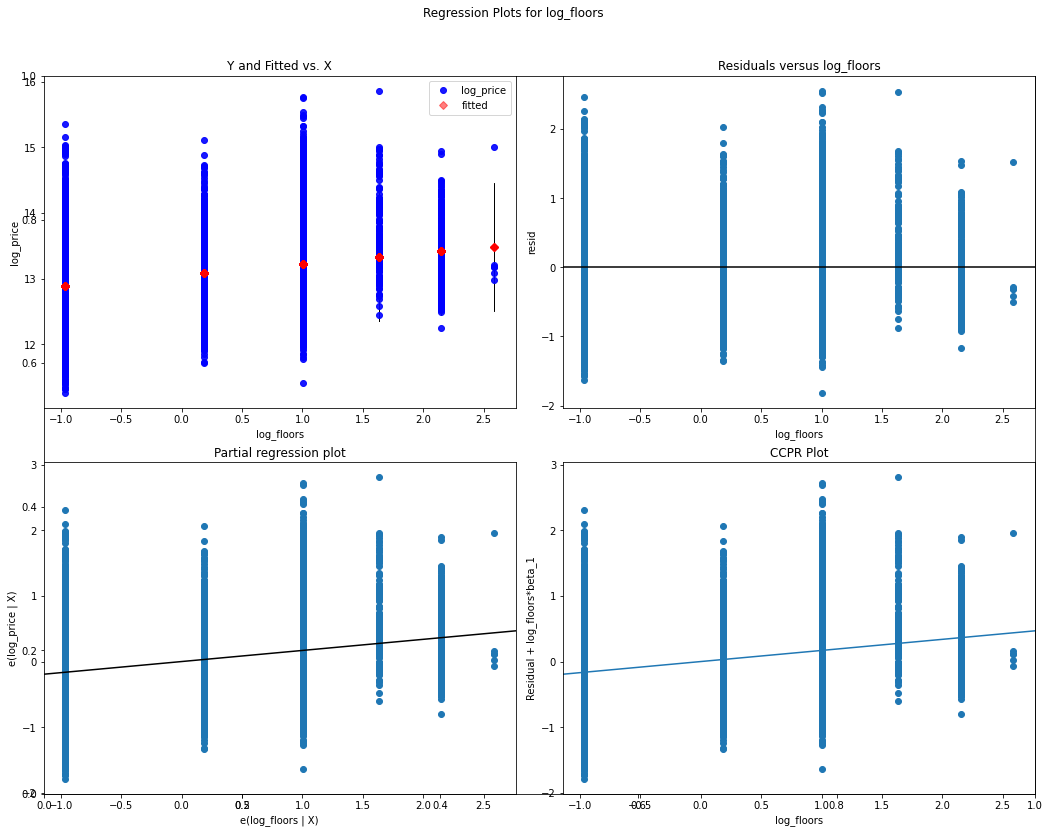

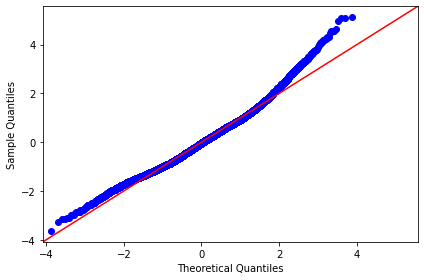

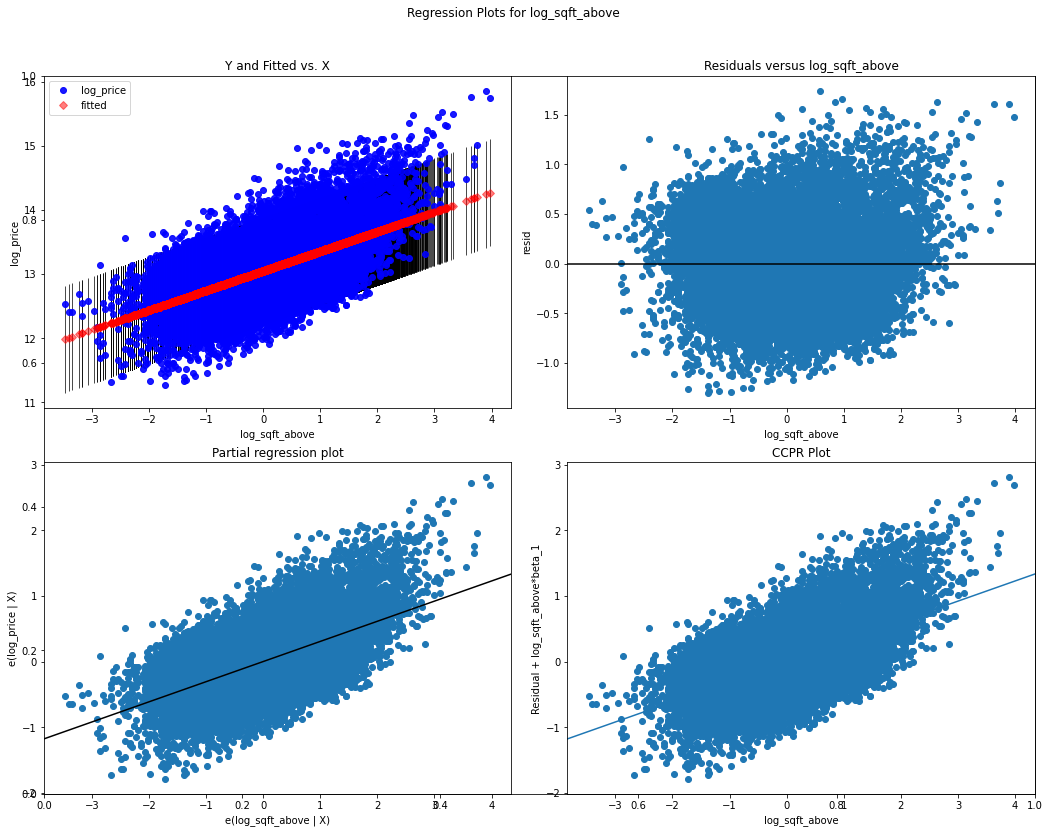

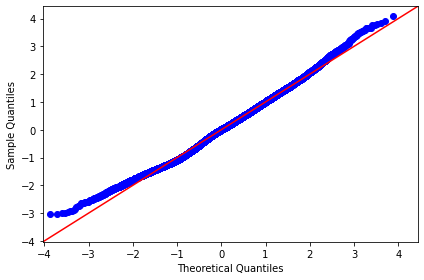

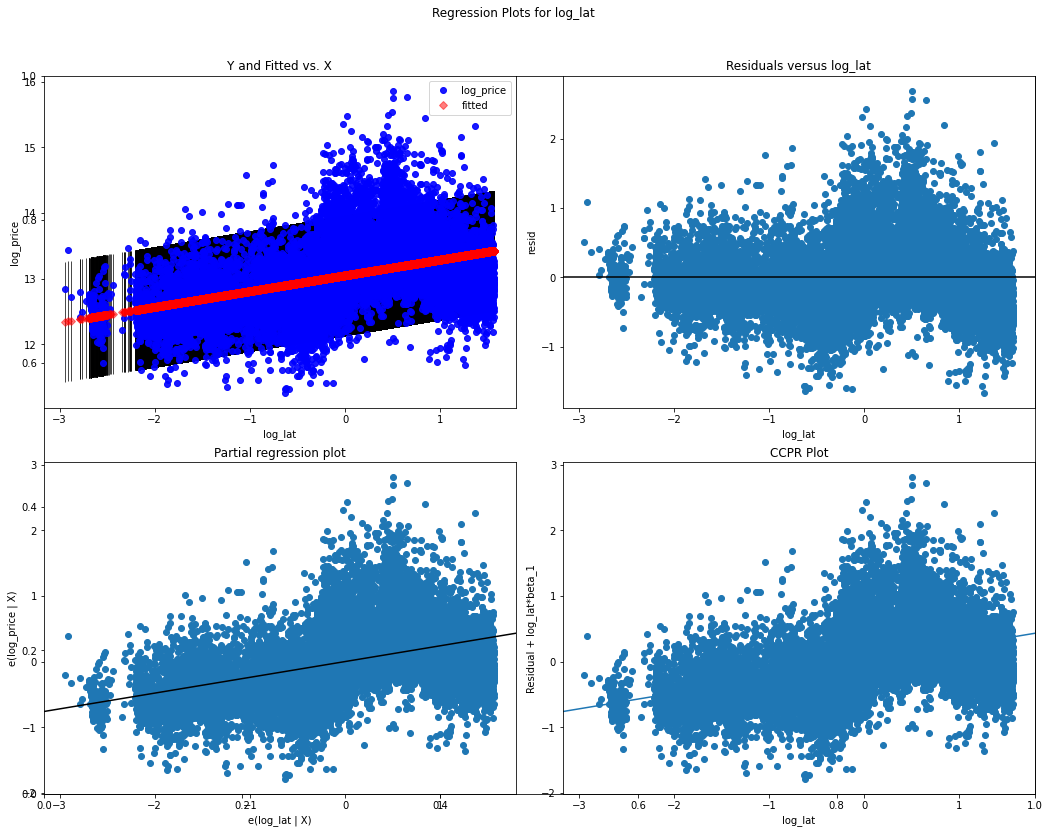

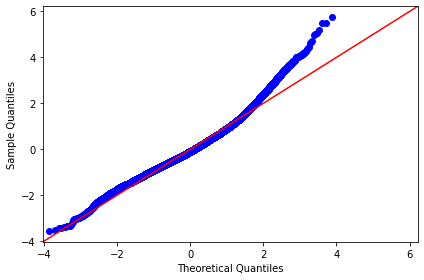

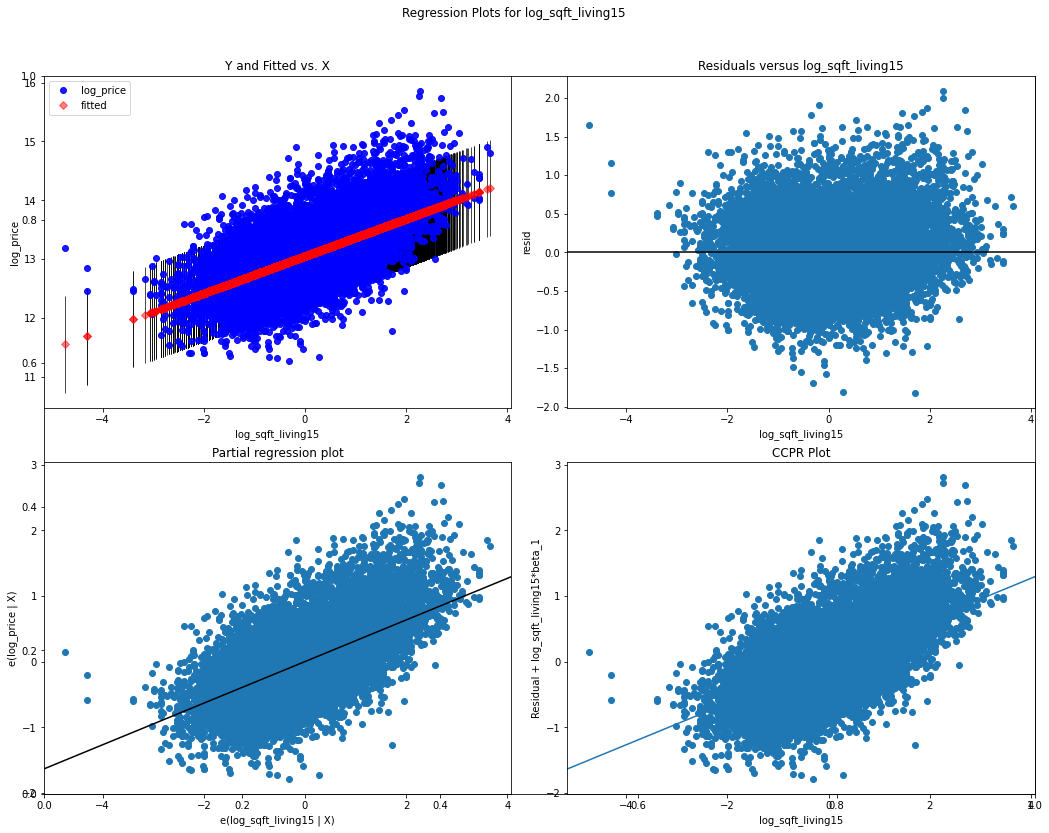

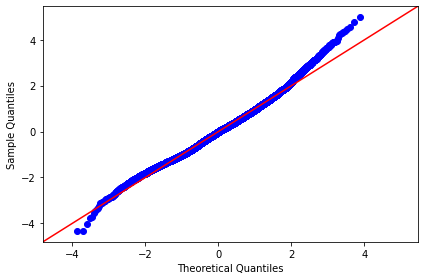

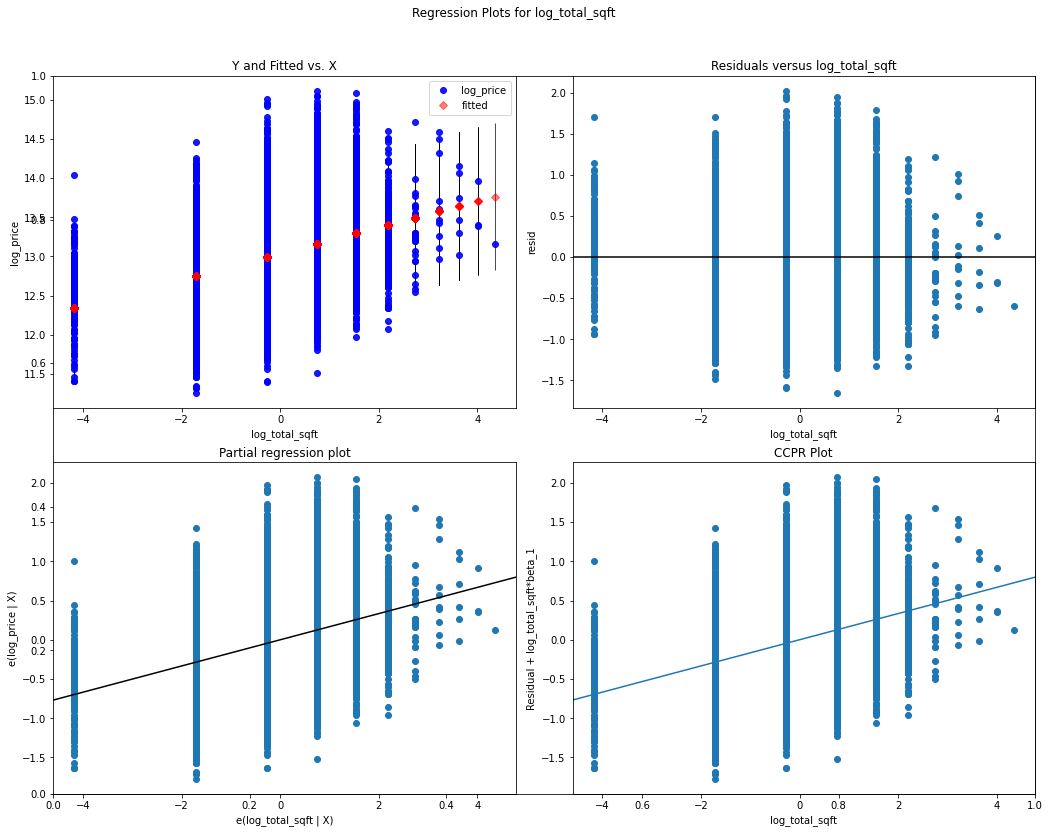

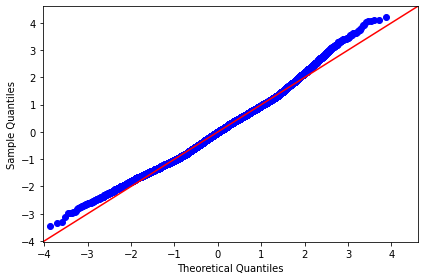

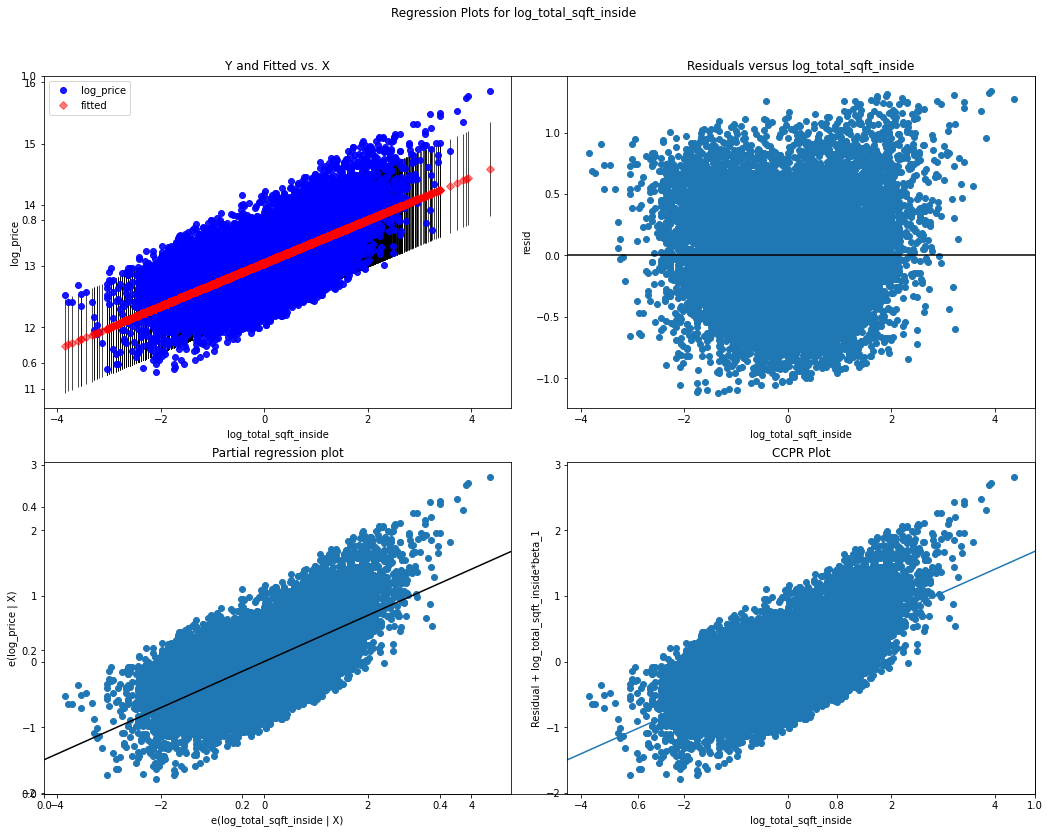

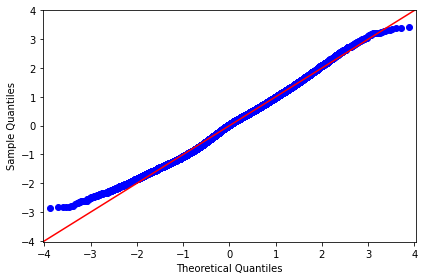

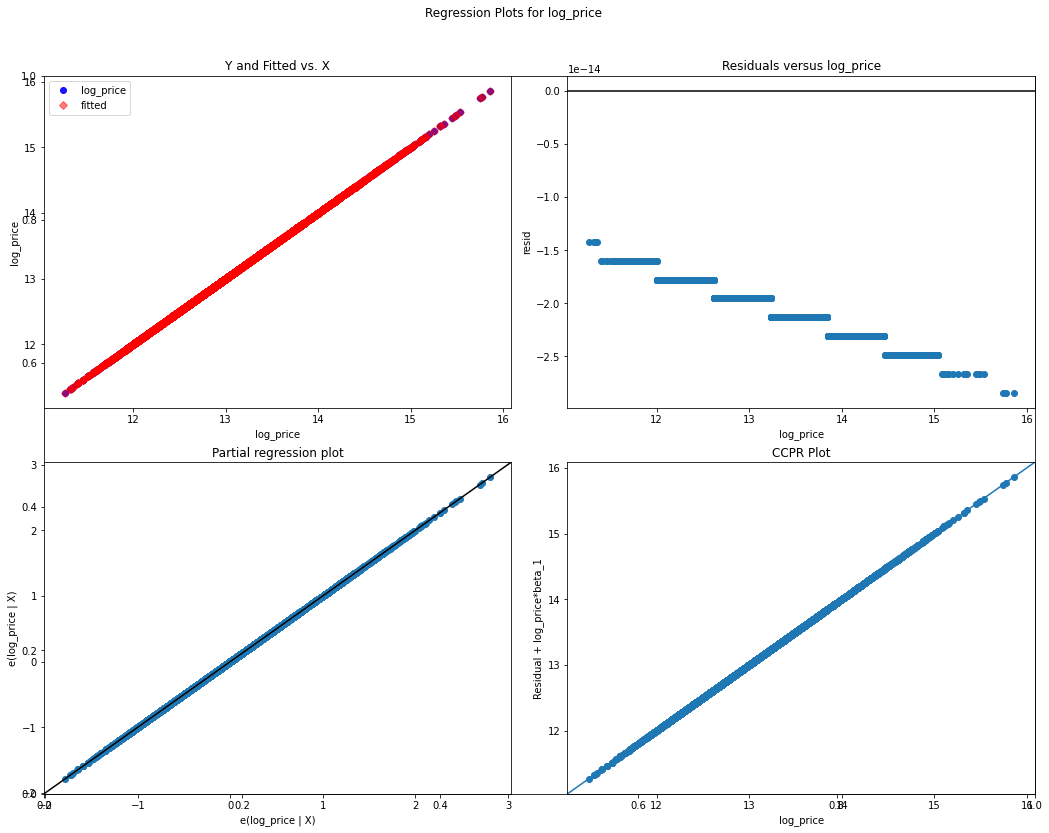

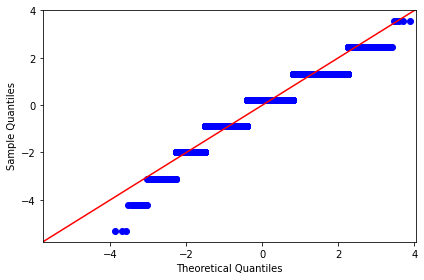

In [281]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms


results = []
for idx, column in enumerate(model_1_data.columns):

    f = f'log_price~{column}'
    model = smf.ols(formula=f, data=model_1_data).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], 
                    sms.jarque_bera(model.resid)[0]])

# 7. Train Test Split

We want to predict the outcome for observations that are not necessarily in our dataset now. The reason for building the model is because we want to predict the outocome for observations that are not in our dataset now.

Train Test Split splits our data randomly to both train the model and test the model.

In [282]:
# concat the log/normalized continuous data with the dummy data
model_1_data = pd.concat([model_1_data,dummy_data],axis=1).dropna()
model_1_data.head()

,log_bedrooms,log_bathrooms,log_sqft_living,log_floors,log_sqft_above,log_lat,log_sqft_living15,log_total_sqft,log_total_sqft_inside,log_price,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,-0.281691,0.340279,0.714133,1.002201,0.676692,1.158215,-0.325651,-0.271391,0.720744,13.195614,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.736166,0.039616,0.874047,0.186916,0.761514,1.127938,-0.670108,0.751212,0.880354,13.255144,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.281691,-1.729774,-1.612073,-0.962165,-1.234103,1.197138,-0.550926,-0.271391,-1.601023,12.660328,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,-1.716280,-1.729774,-1.104713,-0.962165,-0.730894,1.104147,-1.752368,-1.712670,-1.094631,12.854484,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.281691,-0.301248,0.648898,-0.962165,-0.523751,1.166865,-0.531506,-0.271391,0.655634,12.959844,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [283]:
model_1_data.shape

(18718, 62)

In [284]:
# splits the data into training data and testing data
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(model_1_data)

x_train_data = train_data.drop(['log_price'],axis=1)
y_train_data = train_data['log_price']

x_test_data = test_data.drop(['log_price'],axis=1)
y_test_data = test_data['log_price']

print('Training Data')
print('-------------')
print(f'x_train: {len(x_train_data)}')
print(f'y_train: {len(y_train_data)}')
print('\n')
print('Testing Data')
print('-------------')
print(f'x_test: {len(x_test_data)}')
print(f'y_test: {len(y_test_data)}')

Training Data
-------------
x_train: 14038
y_train: 14038


Testing Data
-------------
x_test: 4680
y_test: 4680


# 8. Training the Model



In [285]:
# outcome is target
outcome = 'log_price'
# x_cols are the predictors
x_cols = list(train_data.drop(['log_price'],axis=1).columns)

# testing regression model with current train data
pred_sum = '+'.join(x_cols)
formula = outcome + '~' + pred_sum

model_1_results = ols(formula=formula, data=train_data).fit()
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     955.9
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:15:25   Log-Likelihood:                 991.65
No. Observations:               14038   AIC:                            -1861.
Df Residuals:                   13977   BIC:                            -1401.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.246e+09    3.6e+09      0.624      0.533   -4.81e+09    9.31e+09
log_bedrooms           1.943e+11   3.12e+11      0.624      0.533   -4.16e+11    8.05e+11
log_bathrooms             0.0405      0.004     11.187      0.000       0.033       0.048
log_sqft_living           0.1859      0.020      9.332      0.000       0.147       0.225
log_floors                0.0066      0.003      2.046      0.041       0.000       0.013
log_sqft_above            0.1194      0.008     14.080      0.000       0.103       0.136
log_lat                   0.2029      0.004     49.494      0.000       0.195       0.211
log_sqft_living15         0.0738      0.003     22.552      0.000       0.067       0.080
log_total_sqft        -1.934e+11    3.1e+11     -0.624      0.533   -8.01e+11    4.15e+11
log_total_sqft_inside    -0.1022      0.021     -4.852      0.000      -0.143      -0.061
waterfront_1              0.3920      0.029     13.431      0.000       0.335       0.449
view_1                    0.1411      0.016      8.552      0.000       0.109       0.173
view_2                    0.1355      0.010     13.785      0.000       0.116       0.155
view_3                    0.2005      0.014     14.489      0.000       0.173       0.228
view_4                    0.3050      0.021     14.790      0.000       0.265       0.345
condition_2              -0.0603      0.063     -0.962      0.336      -0.183       0.063
condition_3               0.0819      0.059      1.393      0.164      -0.033       0.197
condition_4               0.1415      0.059      2.405      0.016       0.026       0.257
condition_5               0.2108      0.059      3.565      0.000       0.095       0.327
quarter_sold_2            0.0397      0.007      5.811      0.000       0.026       0.053
quarter_sold_3            0.0363      0.009      4.054      0.000       0.019       0.054
quarter_sold_4            0.0331      0.009      3.616      0.000       0.015       0.051
year_sold_2015            0.0711      0.007     10.253      0.000       0.058       0.085
decade_built_1910        -0.0473      0.015     -3.211      0.001      -0.076      -0.018
decade_built_1920        -0.0420      0.014     -3.090      0.002      -0.069      -0.015
decade_built_1930        -0.1487      0.017     -8.971      0.000      -0.181      -0.116
decade_built_1940        -0.1922      0.013    -14.779      0.000      -0.218      -0.167
decade_built_1950        -0.2489      0.013    -19.537      0.000      -0.274      -0.224
decade_built_1960        -0.2761      0.013    -21.204      0.000      -0.302      -0.251
decade_built_1970        -0.2833      0.013    -21.180      0.000      -0.310      -0.257
decade_built_1980        -0.2468      0.014    -18.123      0.000      -0.273      -0.220
decade_built_1990      

## Interpretation

* R-squared is ~0.804, showing that our data is closely fitted to our regression line
* F-statistic p-value is 0.00, probability that our sample would represent the population, holds true
* There are a lot of p-values > 0.05 for our coefficients, indicating there is no statistically significant relationship between the coefficient and predictor.
* Skewness is -0.020, meaning the data is normal
* Kurtosis is not 3 (normal) and is higher than 3, meaning the tails are heavy

# 9. Remove Multicollinearity

Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. Multicollinearity is a problem because it undermines the statistical significance of an independent variable.

Below we take a look at the independent variables to see if there are high correlation between each independent variable. We use VIF (variable inflation factor) to check each independent variable - values of more than 4 or 5 are sometimes regarded as being moderate to high, with values of 10 or more being regarded as very high.

In [286]:
# outputs the vif scores for each variable (continuous and categorical)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train_data[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('log_bedrooms', 7726878.5578856),
 ('log_bathrooms', 3.4818152399273177),
 ('log_sqft_living', 103.01055257668955),
 ('log_floors', 2.8713480529969426),
 ('log_sqft_above', 18.751209261402224),
 ('log_lat', 4.643040440005772),
 ('log_sqft_living15', 2.855184915139166),
 ('log_total_sqft', 7726931.275087194),
 ('log_total_sqft_inside', 114.8481845055624),
 ('waterfront_1', 1.6063481785338198),
 ('view_1', 1.0398329650428033),
 ('view_2', 1.0795109830626235),
 ('view_3', 1.0861566652353682),
 ('view_4', 1.6178991078721434),
 ('condition_2', 7.934849136684049),
 ('condition_3', 217.24653896686922),
 ('condition_4', 185.05512613416178),
 ('condition_5', 71.04345440624054),
 ('quarter_sold_2', 2.7527081042458854),
 ('quarter_sold_3', 4.409610955925438),
 ('quarter_sold_4', 3.95729087686364),
 ('year_sold_2015', 2.897313222595688),
 ('decade_built_1910', 2.162770352233076),
 ('decade_built_1920', 2.709318193498508),
 ('decade_built_1930', 1.7640201097721844),
 ('decade_built_1940', 3.45356

In [287]:
# removes vif scores > 5
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores),'-->',len(x_cols))

61 --> 48


In [288]:
train_data.head()

,log_bedrooms,log_bathrooms,log_sqft_living,log_floors,log_sqft_above,log_lat,log_sqft_living15,log_total_sqft,log_total_sqft_inside,log_price,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
14678,-0.281691,1.468142,0.000600,1.002201,-0.096580,0.057893,-0.990114,-0.271391,0.008573,12.860999,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
841,0.736166,0.609232,1.457201,1.634586,1.144891,-0.209054,1.357421,0.751212,1.462395,13.676248,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10676,0.736166,0.340279,-0.332667,-0.962165,0.034835,0.562283,0.453059,0.751212,-0.324058,13.217674,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12755,0.736166,0.609232,0.648898,1.002201,1.008369,0.221286,1.315377,0.751212,0.655634,13.361380,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
18689,0.736166,0.609232,1.232051,1.002201,1.586751,-0.932804,1.460068,0.751212,1.237675,12.793859,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# 10. Test Model After Removing Multicollinearity

In [289]:
# testing regression model with current train data
pred_sum = '+'.join(x_cols)
formula = outcome + '~' + pred_sum

model_1_results = ols(formula=formula, data=train_data).fit()
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     935.5
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:15:32   Log-Likelihood:                -359.63
No. Observations:               14038   AIC:                             817.3
Df Residuals:                   13989   BIC:                             1187.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.8633      0.010   1233.094      0.000      12.843      12.884
log_bathrooms         0.1019      0.003     31.146      0.000       0.096       0.108
log_floors            0.0356      0.003     11.926      0.000       0.030       0.041
log_lat               0.2198      0.003     65.079      0.000       0.213       0.226
log_sqft_living15     0.1411      0.003     44.744      0.000       0.135       0.147
waterfront_1          0.3887      0.032     12.117      0.000       0.326       0.452
view_1                0.1567      0.018      8.659      0.000       0.121       0.192
view_2                0.1494      0.011     13.883      0.000       0.128       0.171
view_3                0.2117      0.015     13.955      0.000       0.182       0.241
view_4                0.3351      0.023     14.816      0.000       0.291       0.379
quarter_sold_2        0.0389      0.008      5.184      0.000       0.024       0.054
quarter_sold_3        0.0369      0.010      3.742      0.000       0.018       0.056
quarter_sold_4        0.0307      0.010      3.055      0.002       0.011       0.050
year_sold_2015        0.0619      0.008      8.128      0.000       0.047       0.077
decade_built_1910     0.2177      0.012     18.158      0.000       0.194       0.241
decade_built_1920     0.2159      0.010     21.110      0.000       0.196       0.236
decade_built_1930     0.1111      0.015      7.623      0.000       0.083       0.140
decade_built_1940     0.0520      0.009      5.649      0.000       0.034       0.070
decade_built_1950     0.0142      0.008      1.768      0.077      -0.002       0.030
decade_built_1970    -0.0346      0.008     -4.539      0.000      -0.050      -0.020
decade_built_1980    -0.0224      0.007     -3.037      0.002      -0.037      -0.008
decade_built_2010     0.0480      0.010      5.015      0.000       0.029       0.067
grade_binned_Good     0.2744      0.007     40.120      0.000       0.261       0.288
grade_binned_High     0.5321      0.045     11.695      0.000       0.443       0.621
grade_binned_Poor    -0.2594      0.019    -13.393      0.000      -0.297      -0.221
renovated_1           0.0962      0.012      7.932      0.000       0.072       0.120
basement_1            0.0746      0.005     14.218      0.000       0.064       0.085
city_Bellevue         0.2861      0.010     29.029      0.000       0.267       0.305
city_BlackDiamond     0.2060      0.033      6.208      0.000       0.141       0.271
city_Bothell         -0.3377      0.023    -14.929      0.000      -0.382      -0.293
city_Carnation       -0.2986      0.031     -9.661      0.000      -0.359      -0.238
city_Duvall          -0.4291      0.023    -18.292      0.000      -0.475      -0.383
city_Enumclaw         0.1648      0.023      7.033      0.000       0.119

# 11. Remove the Uninfluential Features

In [290]:
# remove uninfluential features 
summary = model_1_results.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table),'-->' ,len(x_cols))
# print(x_cols[:5])
# p_table.head()

49 --> 43


# 12. Final Model

In [291]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model_1_results = ols(formula=formula, data=train_data).fit()
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1044.
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:15:32   Log-Likelihood:                -363.82
No. Observations:               14038   AIC:                             815.6
Df Residuals:                   13994   BIC:                             1148.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.8632      0.010   1309.931      0.000      12.844      12.882
log_bathrooms         0.1005      0.003     31.184      0.000       0.094       0.107
log_floors            0.0348      0.003     12.133      0.000       0.029       0.040
log_lat               0.2201      0.003     75.354      0.000       0.214       0.226
log_sqft_living15     0.1403      0.003     45.694      0.000       0.134       0.146
waterfront_1          0.3880      0.032     12.108      0.000       0.325       0.451
view_1                0.1585      0.018      8.772      0.000       0.123       0.194
view_2                0.1515      0.011     14.134      0.000       0.130       0.173
view_3                0.2144      0.015     14.194      0.000       0.185       0.244
view_4                0.3380      0.023     14.986      0.000       0.294       0.382
quarter_sold_2        0.0389      0.008      5.179      0.000       0.024       0.054
quarter_sold_3        0.0367      0.010      3.721      0.000       0.017       0.056
quarter_sold_4        0.0305      0.010      3.033      0.002       0.011       0.050
year_sold_2015        0.0617      0.008      8.105      0.000       0.047       0.077
decade_built_1910     0.2152      0.012     18.594      0.000       0.192       0.238
decade_built_1920     0.2133      0.010     21.889      0.000       0.194       0.232
decade_built_1930     0.1083      0.014      7.596      0.000       0.080       0.136
decade_built_1940     0.0483      0.009      5.657      0.000       0.032       0.065
decade_built_1970    -0.0395      0.007     -5.402      0.000      -0.054      -0.025
decade_built_1980    -0.0257      0.007     -3.554      0.000      -0.040      -0.012
decade_built_2010     0.0471      0.010      4.923      0.000       0.028       0.066
grade_binned_Good     0.2745      0.007     40.207      0.000       0.261       0.288
grade_binned_High     0.5311      0.045     11.680      0.000       0.442       0.620
grade_binned_Poor    -0.2599      0.019    -13.438      0.000      -0.298      -0.222
renovated_1           0.0982      0.012      8.121      0.000       0.074       0.122
basement_1            0.0759      0.005     14.845      0.000       0.066       0.086
city_Bellevue         0.2908      0.009     30.920      0.000       0.272       0.309
city_BlackDiamond     0.2076      0.033      6.285      0.000       0.143       0.272
city_Bothell         -0.3349      0.022    -15.086      0.000      -0.378      -0.291
city_Carnation       -0.2973      0.031     -9.676      0.000      -0.357      -0.237
city_Duvall          -0.4273      0.023    -18.503      0.000      -0.473      -0.382
city_Enumclaw         0.1662      0.023      7.209      0.000       0.121       0.211
city_FederalWay      -0.0352      0.013     -2.712      0.007      -0.061

## Interpretation

After removing multicollinearity among the independent variables and removing statistically insignificant features, the r-squared decreased - this is expected since when features are added r-squared goes up.

* R-squared is ~0.804, showing that our data is closely fitted to our regression line
* F-statistic p-value is 0.00, probability that our sample would represent the population, holds true
* There are no more statistically insignificant p-values between the coefficient and predictor. There are a few that are close but can still consider all coefficients to be statistically significant.
* Skewness is ~0.004, meaning the data is normal
* Kurtosis is not 3 (normal) and is higher than 3, meaning the tails are heavy

# 13. Check the Normality Assumption

The normality assumption states that the model residuals should follow a normal distribution. For regression, when checking if the data in this sample is normally distributed, we can use a Normal Q-Q plot to test that assumption.

In the context of normality of residuals, Q-Q plots can help you validate the assumption of normally distributed residuals. It uses standardized values of residuals to determine the normal distribution of errors. Ideally, this plot should show a straight line. A curved, distorted line suggests residuals have a non-normal distribution.

Below the Q-Q plot looks quite normal, except it's a bit heavy on the tails.

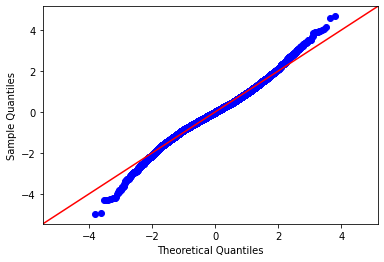

In [292]:
# validate the asssumption of normally distributed residuals
    # should show a straight line
    # a curve,distorted line suggests residuals have a non-normal distribution
import scipy.stats as stats
residuals = model_1_results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# 14. Check Homoscedasticity Assumption

Heteroscedasticity (also spelled heteroskedasticity) refers to the circumstance in which the dependent variable is unequal across the range of values of the predictor(s).

When there is heteroscedasticity in the data, a scatterplot of these variables will often create a cone-like shape. The scatter of the dependent variable widens or narrows as the value of the independent variable increases.

Looks like the data is homoscedasticity.

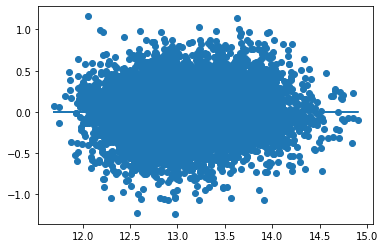

In [293]:
plt.scatter(model_1_results.predict(train_data[x_cols]), model_1_results.resid)
plt.plot(model_1_results.predict(train_data[x_cols]), [0 for i in range(len(train_data))])

# 15. Evaluate the Model

We want to compare the predicted values, y_hat with the actual value, y. The difference between the two values is referred to as the residuals.

* If test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

In [294]:
# outputs the training and testing data rows
print('Training Data')
print('-------------')
print(f'x_train: {len(x_train_data)}')
print(f'y_train: {len(y_train_data)}')
print('\n')
print('Testing Data')
print('-------------')
print(f'x_test: {len(x_test_data)}')
print(f'y_test: {len(y_test_data)}')

Training Data
-------------
x_train: 14038
y_train: 14038


Testing Data
-------------
x_test: 4680
y_test: 4680


**MAE** (mean Absolute Error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**MSE** (Mean Squared Error)represents the difference between the original and predicted values extracted by squared the average difference over the data set.

**RMSE** (Root Mean Squared Error) is the error rate by the square root of MSE.

In [295]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train_data,y_train_data)

y_pred_train = lm.predict(x_train_data)
y_pred_test = lm.predict(x_test_data)

# calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train_data, y_pred_train)
mae_test = mean_absolute_error(y_test_data, y_pred_test)
print("MAE Train Set:", mae_train) 
print("MAE Test Set :", mae_test,'\n')

# calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train_data, y_pred_train)
mse_test = mean_squared_error(y_test_data, y_pred_test)
print("MSE Train Set:", mse_train) 
print("MSE Test Set :", mse_test,'\n')

# calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("RMSE Train Set:", rmse_train)
print("RMSE Test Set:", rmse_test,'\n')

MAE Train Set: 0.16907259824683885
MAE Test Set : 0.16789488861053203 

MSE Train Set: 0.050251813368337055
MSE Test Set : 0.049898978423809845 

RMSE Train Set: 0.22416916239379817
RMSE Test Set: 0.22338079242363218 



All errors are equal between training and test sets. Looks good.

# 16. Cross Validation

Because random samples of data are created for the training and the test set, the MSE depends on how the training and test sets were created.

K-fold cross validation splits the entire dataset into 'K' equal sections of data. We'll then interatively train {K} linear regression models on the data, with each linear model using a different section of data as the test set, and all other sections combined as the training set.

We can then average the individual results from each of these linear models to get a cross-validation MSE.

In [296]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(lm, x_train_data, y_train_data, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(lm, x_train_data, y_train_data, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(lm, x_train_data, y_train_data, cv=20, scoring='neg_mean_squared_error'))

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.05085847916488131
-0.050784995615379594
-0.050761202629240554


# Conclusion